#### ShumetieTefera_HeartDisease_prediction


## <font color=blue>Project Description</font>
> Machine learning may be used to diagnose, detect, and forecast many disorders in the medical industry.It can play an essential role in predicting presence/absence of Heart diseases and more. Such information, if predicted well in advance, can provide important intuitions.

> Heart disease or Cardiovascular disease is the leading cause of death irrespective of gender,age, racial/ethnic groups. It describes a range of conditions that affect the heart. There are many key factors which warns that the person may/may not getting chance of heart disease.The primary purpose of this Project is predicting possible Heart Diseases in people using Machine Learning algorithms.

> In this notebook, we will use the heart disease dataset to build a model that predict whether someone is going to have heart disease or not depending on some attributes. We wiill try to build models using different classification algorithms
. After building each model, we will evalueate them and compare which models performe best for our case. We will then try to optimze our model by tuning the hyperparamters of the model by using GridSearchCV. Lastly, we will save the prediction result from our dataset and then save our model for reussability.
 
> #### Algorithms to be used and compared
        - Logistic Regression (LR)
        - Support Vector Classifier (SVC)
        - K-Nearest Neighbor (KNN)
        - Naive Bayes (NB)
        - Random Forest Classifier (RF)
        - XGBoosting Classifier (XGB)

## <font color=blue>Objective:</font>
The primary Goal of this project is to do classification(<font color=red> Diseased </font> or <font color=green> Not Diseased </font>) based on the data using different classification algorithms and choose the best model with highest accuracy.

## <font color=blue>Import Required Libraries</font>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


## <font color=blue>Load Dataset</font>

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
# First few rows of data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# last few rows of data
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## <font color=blue>Data Dictionary</font>

1. age : age of persons
1. sex : gender of persons 
    * 1 = male
    * 0 = female
1. cp : chest pain type (4 values)
    * 0= Typical angina
    * 1= Atypical angina
    * 2= Non-anginal pain
    * 3= Asymptomatic
1. trtbps : resting blood pressure
1. chol : serum cholestrol in mg/dl
1. fbs : fasting blood sugar > 120 mg/dl
    * 1 = true
    * 0 = false
1. restecg : resting electrocardio results(values 0,1,2)
    * 0: normal, Value 
    * 1: having ST-T wave abnormality 
    * 2: showing probable or definite left ventricular hypertrophy
1. thalach : maximum heart rate achieved
1. exng : exercise induced angina
    * 1 = yes
    * 0 = no
1. oldpeak : ST depression induced by exercise relative to rest   
1. slp : the slope of the peak exercise ST segment
    * 1= upsloping
    * 2: flat
    * 3: downsloping
1. caa : number of major vessels(0-3) colored by flourosopy
    * 0: No major vessels colored by fluoroscopy 
    * 1:One major vessel colored by fluoroscopy 
    * 2:Two major vessels colored by fluoroscopy 
    * 3:Three major vessels colored by fluoroscopy
1. thall :  thalium stress result
    * 0=normal
    * 1=fixed defect
    * 2 = reversable defect
1. output : Target column
    * 1 = Diseased
    * 0 = Not Diseased

## <font color=blue>Data Cleaning (Preprocessing) & Data Overview</font>

#### <font color=blue>Data overview</font>

In [5]:
df.shape

(303, 14)

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are 303 rows and 14 columns in the dataset,
          total of 13 features and 1 target variable</li>
 
 </ul>
</div>

#### <font color=blue>Duplicates</font>

In [6]:
# check for existence of duplicates in the dataset
len(df[df.duplicated()])

1

In [7]:
# Drop the duplicate data
df = df.drop_duplicates()

In [8]:
df.shape

(302, 14)

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
There are 302 rows and 14 columns in the dataset,
          total of 13 features and 1 target variable
</div>

#### <font color=blue>Renaming Columns</font>
The original column names are not very descriptive (are ambiguous). Changing the column names to something descriptive would make it easier to understand what the column represents.

In [9]:
# Original column names
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
# Renaming column names
new_names = {
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest_Pain_Type",
    "trtbps": "Resting_BP",
    "chol": "Cholesterol",
    "fbs": "Fasting_Blood_Sugar",
    "restecg": "Resting_ECG",
    "thalachh": "Max_Heart_Rate",
    "exng": "Exercise_Induced_Angina",
    "oldpeak": "ST_Depression",
    "slp": "ST_Slope",
    "caa": "Num_Major_Vessels",
    "thall": "Thalassemia",
    "output": "Target"
}
df = df.rename(columns=new_names)

In [11]:
df.head()

,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### <font color=blue>VAriable Types of columns</font>


In [12]:
df.dtypes

Age                          int64
Sex                          int64
Chest_Pain_Type              int64
Resting_BP                   int64
Cholesterol                  int64
Fasting_Blood_Sugar          int64
Resting_ECG                  int64
Max_Heart_Rate               int64
Exercise_Induced_Angina      int64
ST_Depression              float64
ST_Slope                     int64
Num_Major_Vessels            int64
Thalassemia                  int64
Target                       int64
dtype: object

In [13]:
df.nunique()

Age                         41
Sex                          2
Chest_Pain_Type              4
Resting_BP                  49
Cholesterol                152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate              91
Exercise_Induced_Angina      2
ST_Depression               40
ST_Slope                     3
Num_Major_Vessels            5
Thalassemia                  4
Target                       2
dtype: int64

In [14]:
df['Num_Major_Vessels'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [15]:
df.Num_Major_Vessels.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: Num_Major_Vessels, dtype: int64

---

Actualy some columns need to be categorical and some numerical
 - Continuous — Age, Resting_BP, Cholestrol, Max_Heart_Rate, ST_Depression
 - Categorical — Sex, Chest_Pain, Fasting_Blood_Sugar, Resting_ECG, Exercise_Induced_Angina, ST_Slope , Num_Major_Vessels, Thalassemia, Target


In [16]:
# converting some features to categorical features 
# Sex
df["Sex"] = df.Sex.apply(lambda  x:'1' if x==1 else '0')
# Chest_Pain_Type
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 1] = '1'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 2] = '2'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 3] = '3'
df['Chest_Pain_Type'][df['Chest_Pain_Type'] == 4] = '4'
#Fasting_Blood_Sugar
df["Fasting_Blood_Sugar"] = df.Fasting_Blood_Sugar.apply(lambda  a:'1' if a==1 else '0')
# Resting_ECG
df['Resting_ECG'][df['Resting_ECG'] == 0] = '0'
df['Resting_ECG'][df['Resting_ECG'] == 1] = '1'
df['Resting_ECG'][df['Resting_ECG'] == 2] = '2'
# ST_Slope
df['ST_Slope'][df['ST_Slope'] == 1] = '1'
df['ST_Slope'][df['ST_Slope'] == 2] = '2'
df['ST_Slope'][df['ST_Slope'] == 3] = '3'
# Exercise_Induced_Angina
df["Exercise_Induced_Angina"] = df.Exercise_Induced_Angina.apply(lambda  x:'1' if x==1 else '0')
# Num_Major_Vessels
df['Num_Major_Vessels'][df['Num_Major_Vessels'] == 0] = '0'
df['Num_Major_Vessels'][df['Num_Major_Vessels'] == 1] = '1'
df['Num_Major_Vessels'][df['Num_Major_Vessels'] == 2] = '2'
df['Num_Major_Vessels'][df['Num_Major_Vessels'] == 3] = '3'

# Thalassemia
df['Thalassemia'][df['Thalassemia'] == 0] = '0'
df['Thalassemia'][df['Thalassemia'] == 1] = '1'
df['Thalassemia'][df['Thalassemia'] == 2] = '2'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      302 non-null    int64  
 1   Sex                      302 non-null    object 
 2   Chest_Pain_Type          302 non-null    object 
 3   Resting_BP               302 non-null    int64  
 4   Cholesterol              302 non-null    int64  
 5   Fasting_Blood_Sugar      302 non-null    object 
 6   Resting_ECG              302 non-null    object 
 7   Max_Heart_Rate           302 non-null    int64  
 8   Exercise_Induced_Angina  302 non-null    object 
 9   ST_Depression            302 non-null    float64
 10  ST_Slope                 302 non-null    object 
 11  Num_Major_Vessels        302 non-null    object 
 12  Thalassemia              302 non-null    object 
 13  Target                   302 non-null    int64  
dtypes: float64(1), int64(5), o

In [18]:
# Select only numerical features
num_columns = (df.select_dtypes(include=['int64', 'float64'])).columns

# Select only categorical features
cat_features =(df.select_dtypes(include=['object'])).columns

In [19]:
num_columns

Index(['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression',
       'Target'],
      dtype='object')

In [20]:
# drop the Target variable from numerical columns
num_features= num_columns.drop('Target')

In [21]:
num_features

Index(['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression'], dtype='object')

#### <font color=blue>data characters mistakes</font>

In [22]:
df[cat_features].nunique()

Sex                        2
Chest_Pain_Type            4
Fasting_Blood_Sugar        2
Resting_ECG                3
Exercise_Induced_Angina    2
ST_Slope                   3
Num_Major_Vessels          5
Thalassemia                4
dtype: int64

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
* The 'Num_Major_Vessels' column has only 4 (0-3) different values but here it shows 5
</div>

In [23]:
df.Num_Major_Vessels.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: Num_Major_Vessels, dtype: int64

In [24]:
df[df['Num_Major_Vessels']==4]

,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thalassemia,Target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [25]:
df.Thalassemia.value_counts()

2    165
3    117
1     18
0      2
Name: Thalassemia, dtype: int64

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
* The 'Thalassemia' column has only 3 (1-3) different values but here it shows 4
</div>

#### <font color=blue>Missing Values</font>

In [26]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_Pain_Type            0
Resting_BP                 0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
ST_Depression              0
ST_Slope                   0
Num_Major_Vessels          0
Thalassemia                0
Target                     0
dtype: int64

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are no missing values in this dataset</li>
 </ul>
</div>

#### <font color=blue>Outliers</font>

<AxesSubplot:>

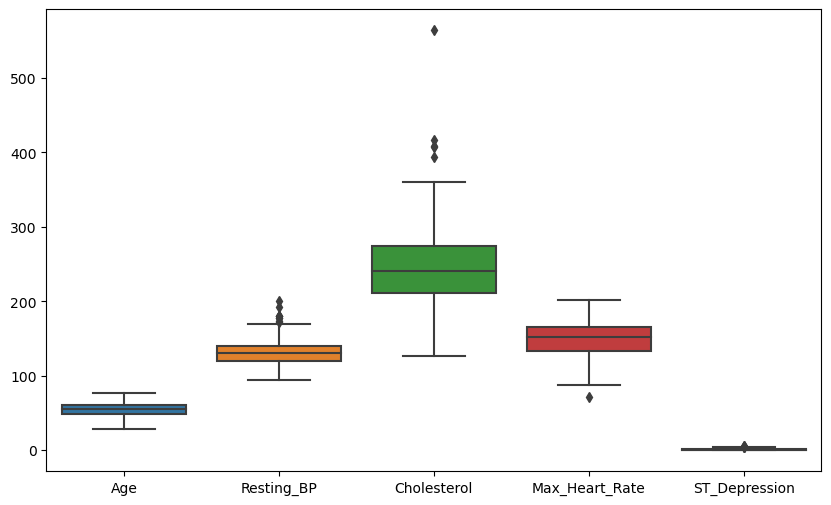

In [27]:
# Create subplots of boxplots for numerical columns
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[num_features])

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are outliers in 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate' columns</li>
 </ul>
</div>

## <font color=blue>Exploratory Data Analysis (EDA)</font>

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
Resting_BP,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
Cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
Max_Heart_Rate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
ST_Depression,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
Target,302.0,0.543046,0.498970,0.0,0.00,1.0,1.00,1.0


### <font color=blue>A. Numerical features vs Target Variable</font>

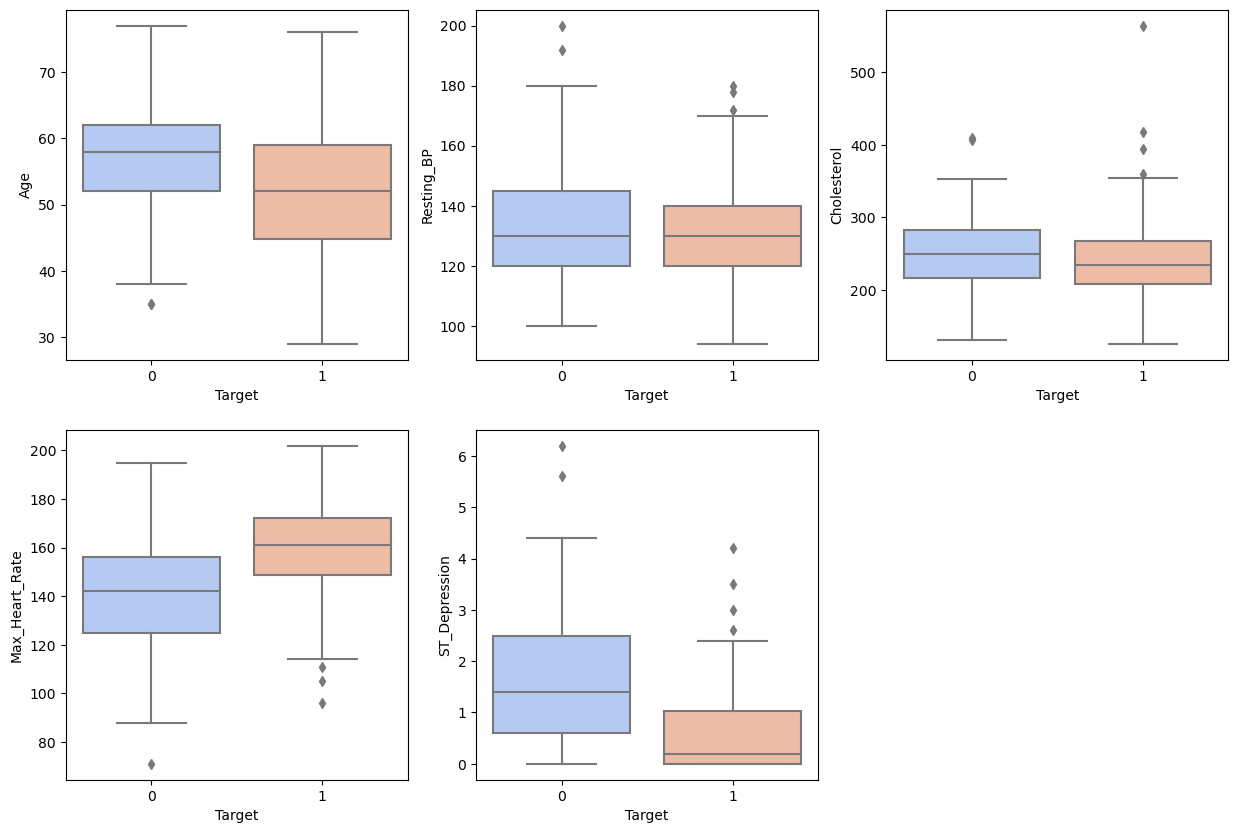

In [29]:
# boxplots to show values of num features across Target var
fig=plt.figure(figsize=(15,10))
palette=sns.color_palette('coolwarm', n_colors=2)
for i in range(len(num_features)):
    column= num_features[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='Target', y=column, data=df, palette=palette)

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
These Box plots shows how the values of numerical features varies across target groups. For example, we can tell that “oldpeak” have distinct difference when target is 0 vs. target is 1, suggesting that it is an important predictor. However, ‘trestbps’ and ‘chol’ appear to be less outstanding, as the box plot distribution is similar between target groups.

### <font color=blue> B. Categorical features vs Target Variable</font>

In [30]:
cat_features_list = ["Sex", "Chest_Pain_Type", "Fasting_Blood_Sugar","Resting_ECG", "Exercise_Induced_Angina", "ST_Slope", 
                            "Num_Major_Vessels", "Thalassemia"]

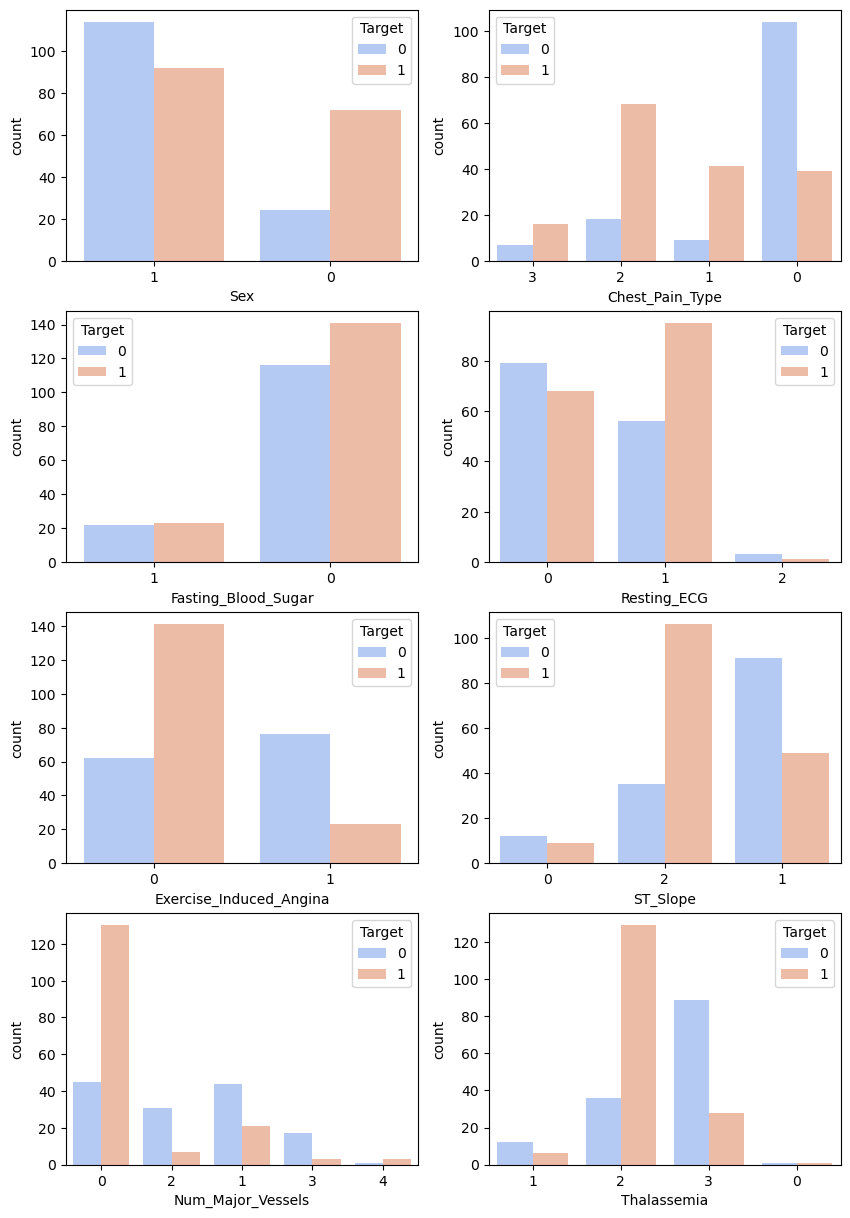

In [32]:
# Visualize distributions of categorical features by target value
# Create plot for each categorical feature
# Create countplot showing count of each category by target value
i = 0
plt.figure(figsize=(10,15))
for cat_feature in cat_features_list:
    i += 1
    plt.subplot(4, 2, i)
    sns.countplot(x = df[cat_feature], data = df, hue = "Target", palette=sns.color_palette('coolwarm', n_colors=2))
plt.show()

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
</div>


* Women have a higher risk of heart disease than men.
* If cp -> typical angina the heart disease risk is very low.
* fbs may not be a distinctive feature for us.
* restecg -> 1 has a higher rate of heart disease than restecg -> 0 (There are few samples for restecg -> 2).
* exang -> 0 has a higher rate of heart disease than exang -> 1.
* slope -> 2 has a higher rate of heart disease than slope -> 1.
* ca -> 0, ca -> 1,2,3 It may be important to us because of the difference between.
* thal -> 2 has a higher rate of heart disease than thal -> 3.

### <font color=blue>C. Univariate Analysis--->Numerical features</font>

In [33]:
def num_summary(x): 
    fig, ax = plt.subplots(figsize=(5,4))
    a=x.skew()
    rt={"skewness":round(a,2)}
   
    sns.distplot(x, kde_kws={"color": "red"})
    plt.show()
    return rt

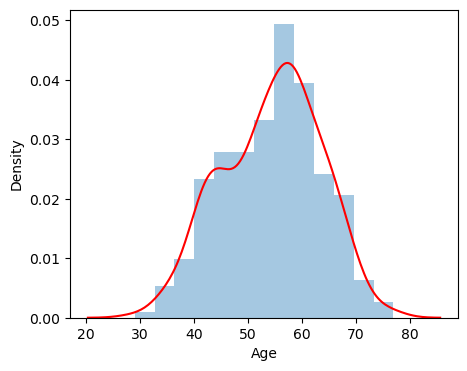

{'skewness': -0.2}

In [34]:
num_summary(df["Age"])

In [35]:
num_features

Index(['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression'], dtype='object')

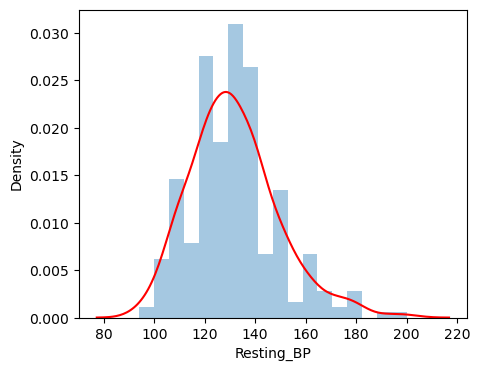

{'skewness': 0.72}

In [36]:
num_summary(df["Resting_BP"])

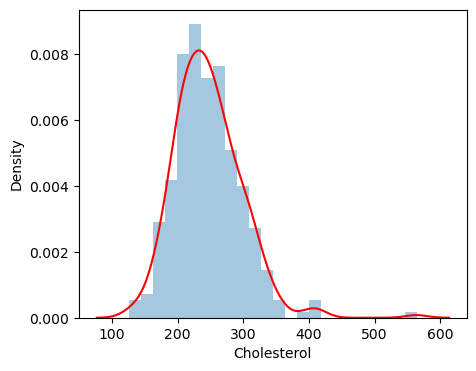

{'skewness': 1.15}

In [37]:
num_summary(df["Cholesterol"])

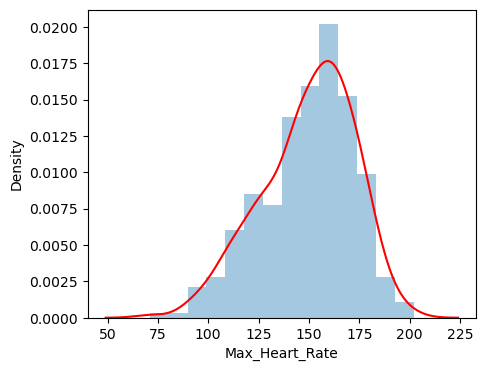

{'skewness': -0.53}

In [38]:
num_summary(df["Max_Heart_Rate"])

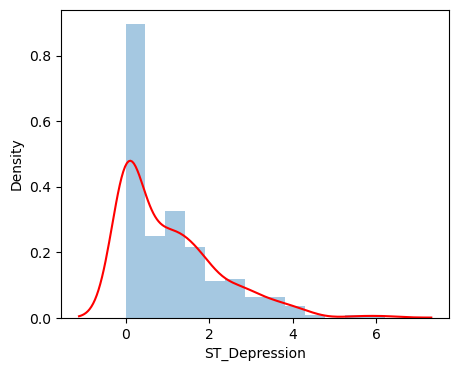

{'skewness': 1.27}

In [39]:
num_summary(df["ST_Depression"])

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> The 'ST_Depression' looks negatively skewed. </li>
     <li> And  all other numerical features look distributed normally </li>
    </ul>
</div>

### <font color=blue>D. Univariate Analysis--->Categorical features</font>

In [40]:
cat_features

Index(['Sex', 'Chest_Pain_Type', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Exercise_Induced_Angina', 'ST_Slope', 'Num_Major_Vessels',
       'Thalassemia'],
      dtype='object')

In [41]:
cat_features_1=['Sex', 'Chest_Pain_Type', 'Fasting_Blood_Sugar', 'Resting_ECG']
cat_features_2= ['Exercise_Induced_Angina', 'ST_Slope', 'Num_Major_Vessels',
       'Thalassemia']
# define a function to plot piecarts for each subcategory of the cat_features
def list_cat(cat):
    fig, axes = plt.subplots(nrows=1, ncols=len(cat), figsize=(20, 6))

# Iterate over categorical columns and create pie charts
    for i, col in enumerate(cat):
        # Count the frequency of each category
        category_counts = df[col].value_counts()

        # Create the pie chart
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(col)
        axes[i].axis('equal')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()



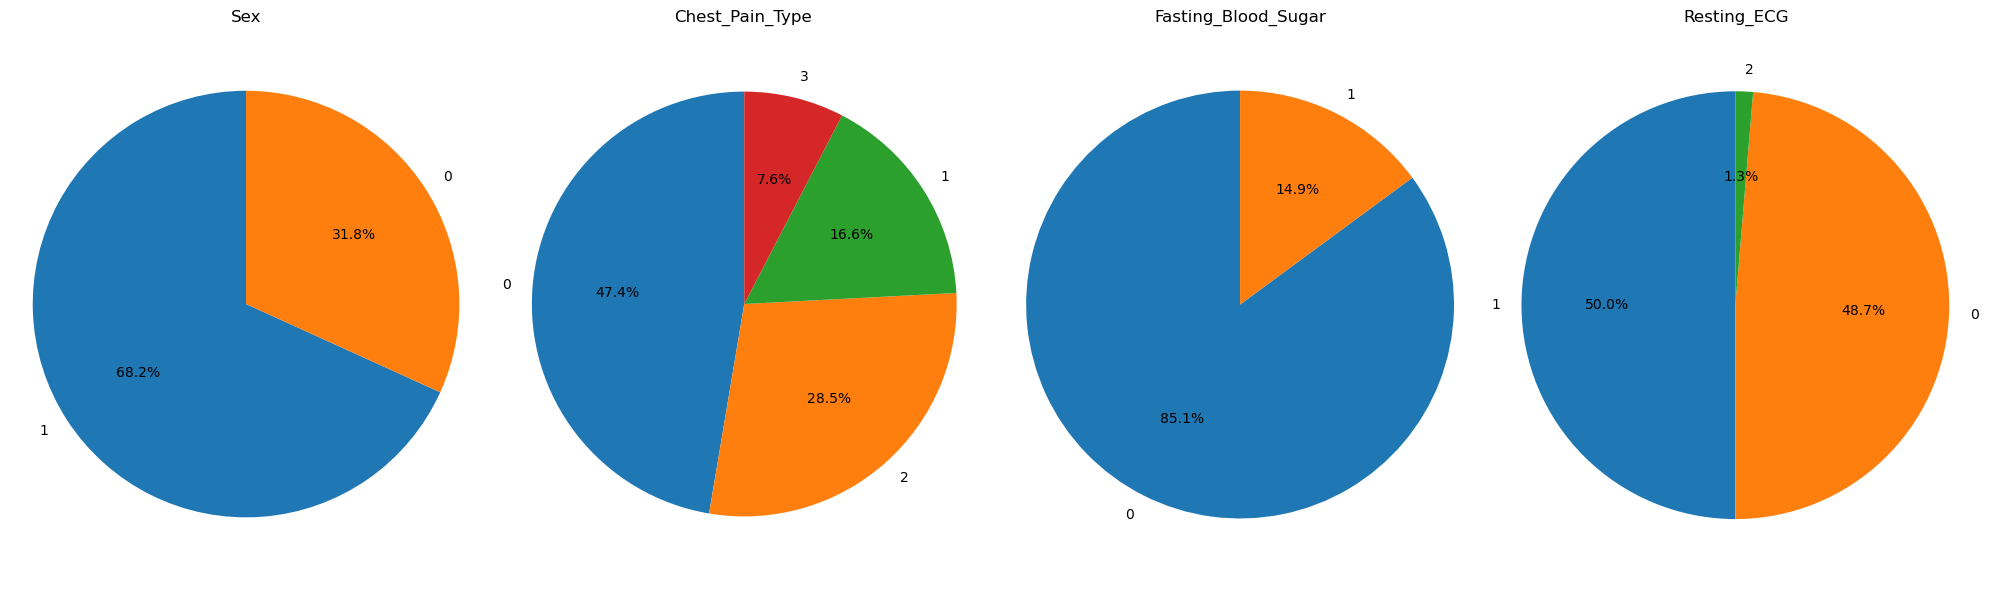

In [42]:
list_cat(cat_features_1)

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> More than 68% of the participants are male</li>
     <li> Almost half of the record data shows people with Chest_pain_Type of Typical Angena(0)</li>
     <li> >85% of the sample data shows fasting blood sugar amount  less than 120mg/dl</li>
     <li> The data shows resting electrocardio results of values 1(having ST-T wave abnormality) covers half of the total record</li>
    </ul>
</div>

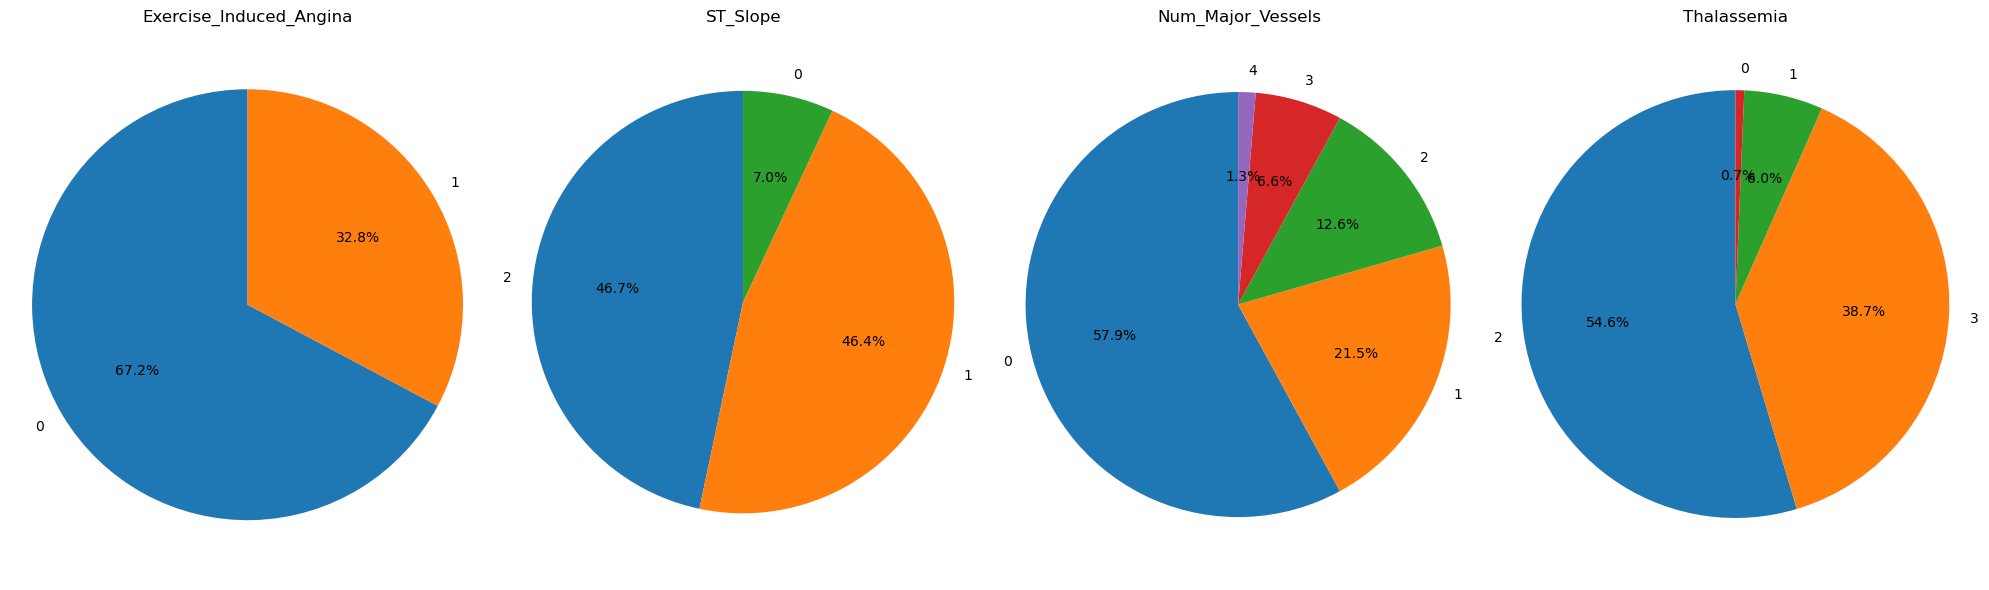

In [43]:
list_cat(cat_features_2)

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
In all the features in this subcategory, >50% of records shows from same column values
</div>
 

## <font color=blue>Correlation Matrix</font>

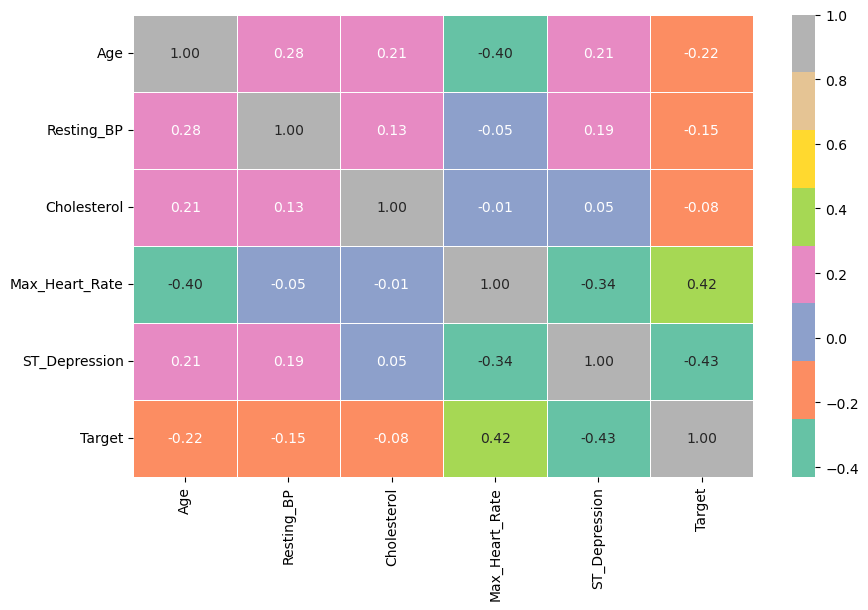

In [44]:
# correlation matrix for num featres
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5, fmt=".2f", cmap="Set2")

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> 'Max_Heart-Rate' shows positive correlation with Target variable</li>
     <li> 'ST_Depression' shows negative correlation with Target variable</li>
     <li> 'Resting_Bp' and "Cholestrol' shows low correlation with Target variable</li>
    </ul>
</div>
 

## <font color=blue>Feature Engineering</font>

#### <font color=blue>Fix data characters mistakes</font>

In [45]:
# Replace the mistake values in  "Num_Major_Vessels", "Thalassemia" columns with their respective modes
df['Num_Major_Vessels'] = df['Num_Major_Vessels'].replace(4, df['Num_Major_Vessels'].mode()[0])
df['Thalassemia'] = df['Thalassemia'].replace(0, df['Thalassemia'].mode()[0])

In [46]:
df.Num_Major_Vessels.value_counts()

0    179
1     65
2     38
3     20
Name: Num_Major_Vessels, dtype: int64

In [47]:
df.Thalassemia.value_counts()

2    165
3    117
1     18
0      2
Name: Thalassemia, dtype: int64

#### <font color=blue>Handling Outliers (IQR /Interquartile Range Method:)</font>

In [48]:
# Calculate the median value of each feature
median_values = df.median()

# Calculate the interquartile range (IQR) of num_features
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for values in each num column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value of corresponding feature
for col in num_features:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = median_values[col]

<AxesSubplot:>

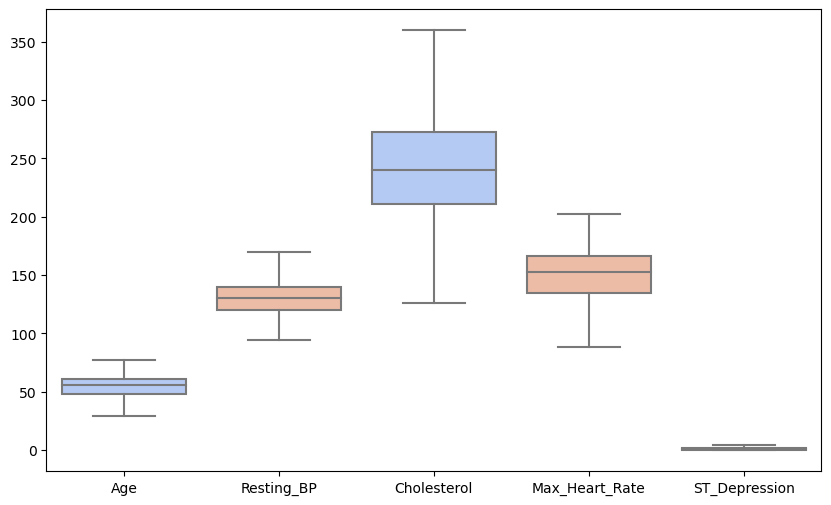

In [49]:
# check for outliers again
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_features], palette=sns.color_palette('coolwarm', n_colors=2))

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
Now there are no outliers in anyone of the numerical columns
</div>

In [50]:
# Encode categorical features using the get_dummies function
df = pd.get_dummies(df, columns = cat_features_list)

In [51]:
df

,Age,Resting_BP,Cholesterol,Max_Heart_Rate,ST_Depression,Target,Sex_0,Sex_1,Chest_Pain_Type_0,Chest_Pain_Type_1,...,ST_Slope_1,ST_Slope_2,Num_Major_Vessels_0,Num_Major_Vessels_1,Num_Major_Vessels_2,Num_Major_Vessels_3,Thalassemia_3,Thalassemia_0,Thalassemia_1,Thalassemia_2
0,63.0,145,233.0,150.0,2.3,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,37.0,130,250.0,187.0,3.5,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41.0,130,204.0,172.0,1.4,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,56.0,120,236.0,178.0,0.8,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
4,57.0,120,354.0,163.0,0.6,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,140,241.0,123.0,0.2,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
299,45.0,110,264.0,132.0,1.2,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
300,68.0,144,193.0,141.0,3.4,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
301,57.0,130,131.0,115.0,1.2,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0


## <font color=blue>Split Data</font>

### X and y

In [52]:
X=df.drop("Target", axis=1)
y=df["Target"]

In [53]:
X

,Age,Resting_BP,Cholesterol,Max_Heart_Rate,ST_Depression,Sex_0,Sex_1,Chest_Pain_Type_0,Chest_Pain_Type_1,Chest_Pain_Type_2,...,ST_Slope_1,ST_Slope_2,Num_Major_Vessels_0,Num_Major_Vessels_1,Num_Major_Vessels_2,Num_Major_Vessels_3,Thalassemia_3,Thalassemia_0,Thalassemia_1,Thalassemia_2
0,63.0,145,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,37.0,130,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41.0,130,204.0,172.0,1.4,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
3,56.0,120,236.0,178.0,0.8,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,57.0,120,354.0,163.0,0.6,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,140,241.0,123.0,0.2,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
299,45.0,110,264.0,132.0,1.2,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
300,68.0,144,193.0,141.0,3.4,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
301,57.0,130,131.0,115.0,1.2,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


#### <font color=blue>Data Imbalance</font>

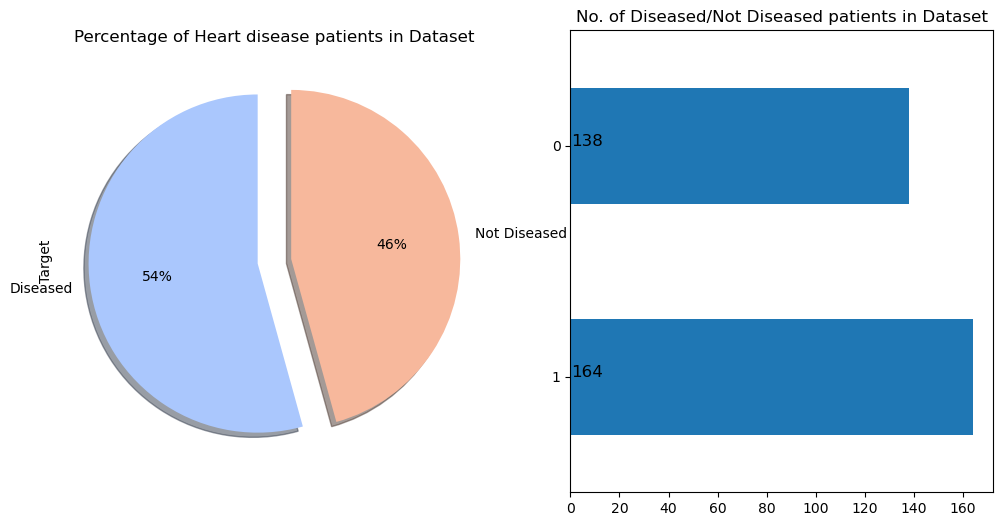

In [54]:
# Plotting Heart Disease distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,6))
palette=sns.color_palette('coolwarm', n_colors=2)
ax1 = df['Target'].value_counts().plot.pie( x="Heart disease" ,y ='no. of patients',colors = palette,
                   autopct = "%1.0f%%",labels=["Diseased","Not Diseased"], startangle = 90,ax=ax1, explode=[.1,.1],shadow =True);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["Target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["Target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Diseased/Not Diseased patients in Dataset')
plt.show()


In [55]:
y.value_counts()

1    164
0    138
Name: Target, dtype: int64

In [56]:
#!pip3 install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
X_resampled, y_resampled =SMOTE().fit_resample(X,y)

In [59]:
y_resampled.value_counts()

1    164
0    164
Name: Target, dtype: int64

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Output/Target column is now fully balanced</li>   
   </ul>
</div>

In [60]:
X_train,X_test, y_train,  y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [61]:
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  262
X_test:  66
y_train:  262
y_test:  66


In [62]:
X_test.shape

(66, 29)

#### <font color=blue>Feature scaling</font>

In [63]:
st=StandardScaler()

In [64]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [65]:
X_train

array([[-0.53370852,  1.30285972,  0.02775908, ..., -0.0877058 ,
        -0.23759548, -1.01538552],
       [ 1.24621997,  1.30285972, -0.37078569, ..., -0.0877058 ,
        -0.23759548,  0.98484761],
       [-1.64616383,  0.63328489, -1.00376857, ..., -0.0877058 ,
        -0.23759548, -1.01538552],
       ...,
       [ 1.57995657,  1.97243454, -0.18323521, ..., -0.0877058 ,
        -0.23759548,  0.98484761],
       [ 0.68999232,  0.23154   , -0.18323521, ..., -0.0877058 ,
        -0.23759548,  0.98484761],
       [ 0.91248338,  0.63328489, -1.09754381, ..., -0.0877058 ,
        -0.23759548,  0.98484761]])

#### <font color=blue>PCA</font>

In [66]:
pca=PCA(n_components=0.95) 

In [67]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [68]:
explained_variance_ratios=pca.explained_variance_ratio_

In [69]:
column_names = df.columns
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"{column_names[i]}: {var_ratio}")

Age: 0.16802868268561805
Resting_BP: 0.08351005359466124
Cholesterol: 0.0767224301640008
Max_Heart_Rate: 0.0672463518436375
ST_Depression: 0.057261997047350924
Target: 0.05220785220320824
Sex_0: 0.05081363618983847
Sex_1: 0.045035412500654265
Chest_Pain_Type_0: 0.040839132658744295
Chest_Pain_Type_1: 0.03872092534151679
Chest_Pain_Type_2: 0.038320842723627235
Chest_Pain_Type_3: 0.037017689121229776
Fasting_Blood_Sugar_0: 0.03459325912599512
Fasting_Blood_Sugar_1: 0.03176885085608603
Resting_ECG_0: 0.03130200477928825
Resting_ECG_1: 0.028846326204242535
Resting_ECG_2: 0.024313616286511866
Exercise_Induced_Angina_0: 0.023491392458585857
Exercise_Induced_Angina_1: 0.022860771553280427


In [70]:
sum(pca.explained_variance_ratio_ )

0.9529012273380777

## <font color=blue>Model Selection</font>

### <font color=red>A. Logistic regression</font>

In [71]:
params = {'C': [0.1, 1, 10],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear', 'saga']}
log=LogisticRegression()
grid_search = GridSearchCV(log, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
#
print("Best hyperparameters: ", grid_search.best_params_)
print("Best test score: {:.2f}".format(grid_search.best_score_))
y_pred_log = grid_search.predict(X_test)

# Calculate accuracy score of the best model on the test set
acc_score = accuracy_score(y_test, y_pred_log)
print("Accuracy score: {:.2f}".format(acc_score))
log.fit(X_train,y_train)

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best test score: 0.87
Accuracy score: 0.88


LogisticRegression()

### <font color=red>B. SVC (Support Vector Classifier) </font>

In [72]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

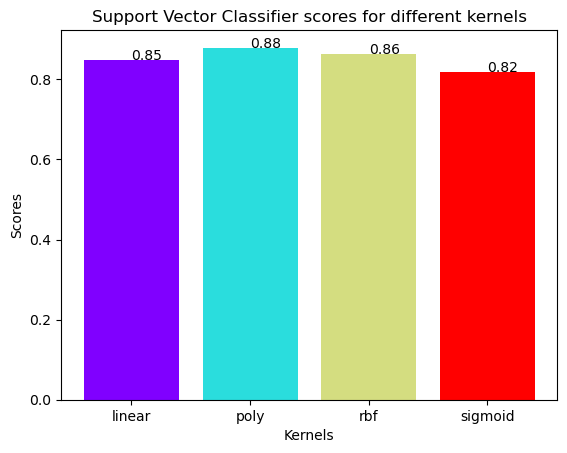

In [73]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], "{:.2f}".format(svc_scores[i]))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

poly and rbf give the best performance; But decision boundaries generated by the poly and linear kernel may be easier to interpret than those generated by the other kernels.

In [74]:
svc=SVC(kernel='poly')

In [75]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [76]:
y_pred_svc=svc.predict(X_test)

### <font color=red>C. KNN (K-Nearest Neighbors) </font>

In [77]:
k_range = list(range(1, 31))

In [78]:
param_knn = dict(n_neighbors=k_range)
knn=KNeighborsClassifier(param_knn)

In [79]:
grid_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')

In [80]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors={'n_neighbors': [1, 2,
                                                                         3, 4,
                                                                         5, 6,
                                                                         7, 8,
                                                                         9, 10,
                                                                         11, 12,
                                                                         13, 14,
                                                                         15, 16,
                                                                         17, 18,
                                                                         19, 20,
                                                                         21, 22,
                                                                         23, 24,
                 

In [81]:
print(grid_knn.best_params_)

{'n_neighbors': 13}


In [82]:
knn= KNeighborsClassifier(n_neighbors=13)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [84]:
y_pred_knn=knn.predict(X_test)

### <font color=red>E. RF(Random Forest)</font>

In [85]:
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [86]:
rf = RandomForestClassifier(random_state=42)
grid_ref = GridSearchCV(rf, param_rf, cv=5, scoring='accuracy')

In [87]:

grid_ref.fit(X_train, y_train)
print("Best parameters: ", grid_ref.best_params_)
print("Best accuracy score: ", grid_ref.best_score_)
best_rf = grid_ref.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best accuracy score:  0.8547169811320755


In [88]:
# RF with best params
rfc= RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5,min_samples_leaf=1, random_state=42)

In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [90]:
y_pred_rfc= rfc.predict(X_test)

In [91]:
acc_sc=accuracy_score(y_test, y_pred_rfc)


### <font color=red>G. XGBoost</font>

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier

In [93]:
xgb = XGBClassifier()

In [94]:
from sklearn.pipeline import Pipeline

In [95]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

In [96]:
param_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
    'xgb__max_depth': [3, 5, 7]
}


In [97]:
grid_search = GridSearchCV(pipeline, param_xgb, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                     

In [98]:
xgb = XGBClassifier(n_estimators=grid_search.best_params_['xgb__n_estimators'],
                    learning_rate=grid_search.best_params_['xgb__learning_rate'],
                    max_depth=grid_search.best_params_['xgb__max_depth'])
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}


In [100]:
# xgb with best params
xgb = XGBClassifier(n_estimators=50,
                    learning_rate=0.1,
                    max_depth=3)

In [101]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
y_pred_xgb=xgb.predict(X_test)

In [103]:
acc_sc = accuracy_score(y_test, y_pred_xgb)

### <font color=red>G. Gaussian Neive Bayes</font>

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [106]:
nb = GaussianNB()

In [107]:
grid_nb = GridSearchCV(estimator=nb, param_grid=param_nb, cv=5)

In [108]:
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [109]:
print(grid_nb.best_params_)

{'var_smoothing': 1e-09}


In [110]:
# Gausian nb with best params
nb = GaussianNB(var_smoothing=1e-09)

In [111]:
nb.fit(X_train, y_train)

GaussianNB()

In [112]:
y_pred_nb=nb.predict(X_test)

In [113]:
acc_sc = accuracy_score(y_test, y_pred_nb)

----

## <font color=blue>Model Comparison </font> 

In [114]:
model_compare= pd.DataFrame({'models':["LogReg","SVC", "KNN", "RFC","NB","XGB"],
                           'accuracy':[accuracy_score(y_test, y_pred_log)*100,
                                      accuracy_score(y_test, y_pred_svc)*100,
                                      accuracy_score(y_test, y_pred_knn)*100,                                    
                                      accuracy_score(y_test, y_pred_rfc)*100,
                                      accuracy_score(y_test, y_pred_nb)*100,
                                      accuracy_score(y_test, y_pred_xgb)*100]})

In [115]:
model_compare

,models,accuracy
0,LogReg,87.878788
1,SVC,87.878788
2,KNN,86.363636
3,RFC,84.848485
4,NB,80.303030
5,XGB,83.333333


<AxesSubplot:xlabel='models', ylabel='accuracy'>

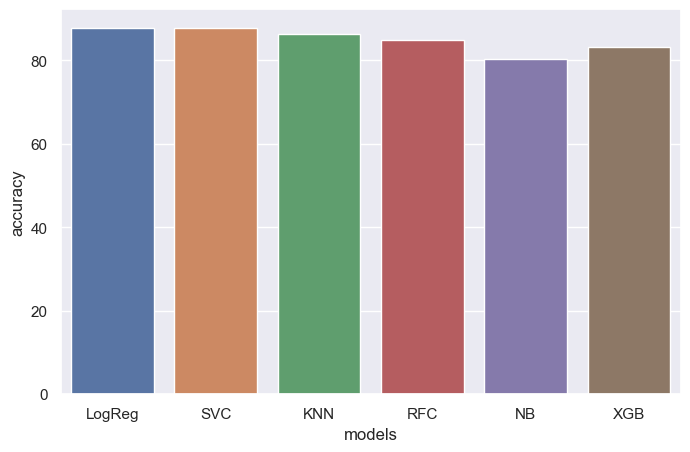

In [116]:
sns.set(rc={"figure.figsize":(8, 5)}) 
sns.barplot(x=model_compare['models'], y=model_compare['accuracy'])

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
SVC and LogReg performs best. Let's use Receiver Operating Characteristic (ROC) curve to compare and choose between theses classifiers.
</div>

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

In [118]:
# svc with proba
svc=SVC(kernel='poly', probability=True)

In [119]:
svc.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

In [120]:
y_pred_svc=svc.predict(X_test)

In [121]:
# log to compete with svc
log=LogisticRegression(C= 10, penalty= 'l1', solver= 'saga')

In [122]:
log.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='saga')

In [123]:
y_pred_log=log.predict(X_test)

In [124]:
svc_probs = svc.predict_proba(X_test)[:, 1]
log_probs = log.predict_proba(X_test)[:, 1]

In [125]:
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_probs)
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)

In [126]:
svc_auc = roc_auc_score(y_test, svc_probs)
log_auc = roc_auc_score(y_test, log_probs)

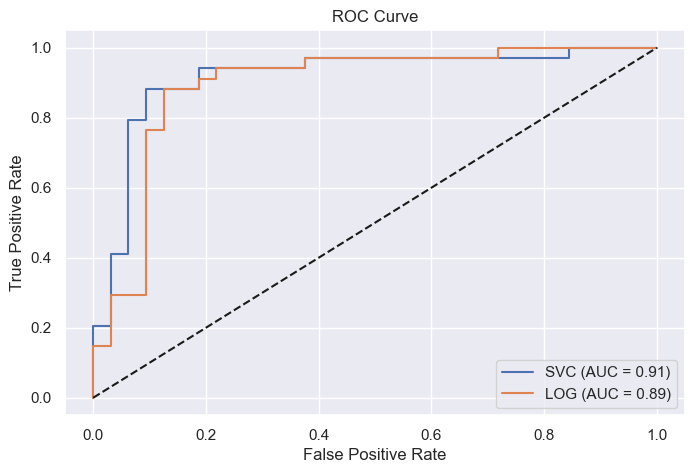

In [127]:
plt.plot(svc_fpr, svc_tpr, label=f'SVC (AUC = {svc_auc:.2f})')
plt.plot(log_fpr, log_tpr, label=f'LOG (AUC = {log_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
SVC model is the one that achieves the highest Area Under the Curve (AUC) score
</div>

## <font color=blue>Model Building & Fine-tuning</font> 

In [145]:
model_svc=SVC(C=10, kernel='poly', gamma='auto', random_state=42)

In [146]:
model_svc.fit(X,y)

SVC(C=10, gamma='auto', kernel='poly', random_state=42)

In [147]:
y_pred_model_svc=model_svc.predict(X)

In [148]:
acc_score_svc=accuracy_score(y, y_pred_model_svc)
print(acc_score_svc)

0.8642384105960265


## <font color=blue>Confusion Matrix </font> 

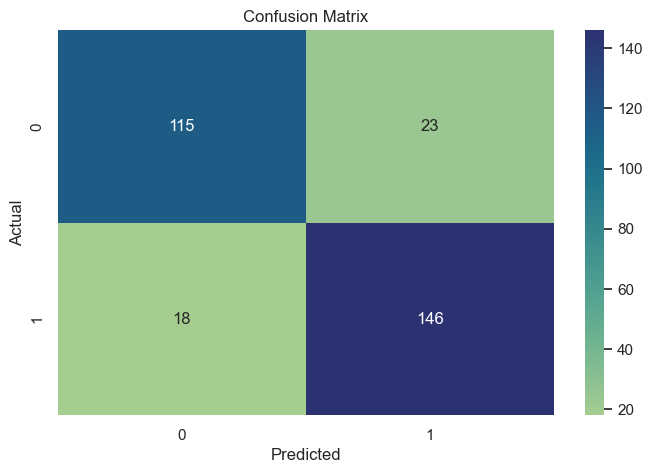

In [152]:
cm = confusion_matrix(y, y_pred_model_svc)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="crest", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## <font color=blue>Save The Model </font> 

In [155]:
import joblib
import sklearn
from joblib import dump, load

In [156]:
scikit_ver=sklearn.__version__
scikit_ver

'1.0.2'

In [157]:
joblib.dump(model_svc, 'ShumetieTefera_HeartDisease_Capstone.pkl'.format(version=scikit_ver))

['ShumetieTefera_HeartDisease_Capstone.pkl']